# UCI Machine Learning Repository Cancer dataset Analysis
### 2018-1학기 고려대학교 김현철 교수님 인공지능 기말과제
#### 2018.06.08 2013130625 조성표

# Data Preprocessing

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen

In [257]:
UCI_cancer_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
names= ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
              'radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 
              'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius',
              'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 
              'worst concave points', 'worst symmetry', 'worst fractal dimension']

cancer = pd.read_csv(urlopen(UCI_cancer_URL), names=names, header=None)
display(cancer.head())
print(cancer.shape)

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 32)


In [57]:
# See if there is NaN values in this Dataframe
print("NaN values in each columns: \n",cancer.isnull().sum())

NaN values in each columns: 
 id                         0
diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


모든 instance에 빠진 값이 없으므로, 따로 이에 대한 전처리는 하지 않은 채 진행하도록 합니다. 그러나 위의 dataframe에서 853402등으로 표기된 id는 현재 있는 인덱스 0,1,2...로 대체해도 상관 없으므로 지웁니다. 그리고 'diagnosis'란의 label이 'M(malignent)'와 'B(benign)'으로만 표시되어 있는데, 이를 편의를 위해 각각 1과 0이라는 이진수 표기로 바꾸도록 하겠습니다.


In [64]:
# Drop column 'id', and convert M to 1, B to 0
cancer_ = cancer.drop(cancer.columns[0], axis=1)
cancer_.diagnosis = cancer_.diagnosis.map({'M':1, 'B':0})

# Let's see how much positive/negative cases are in 'diagnosis' column
cancer_.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [75]:
counts = cancer_.diagnosis.value_counts().tolist()
print('Benign accounts for {:.2f}% of the diagnosis class'.format(counts[0] / len(cancer_.diagnosis) * 100))
print('Malignant accounts for {:.2f}% of the diagnosis class'.format(counts[1] / len(cancer_.diagnosis) * 100))

Benign accounts for 62.74% of the diagnosis class
Malignant accounts for 37.26% of the diagnosis class


Class Imbalance가 발견되지 않으므로, 분석을 계속 진행하도록 하겠습니다. 우선 각 특징들의 여러가지 특성을 .describe()를 사용하여 분석해보도록 하겠습니다.

In [76]:
cancer_.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visual Analysis

먼저 데이터 시각화를 위해 Seaborn을 사용할 것입니다. Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 챠트 등의 기능을 추가한 시각화 패키지입니다. Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조해주세요.


https://seaborn.github.io/

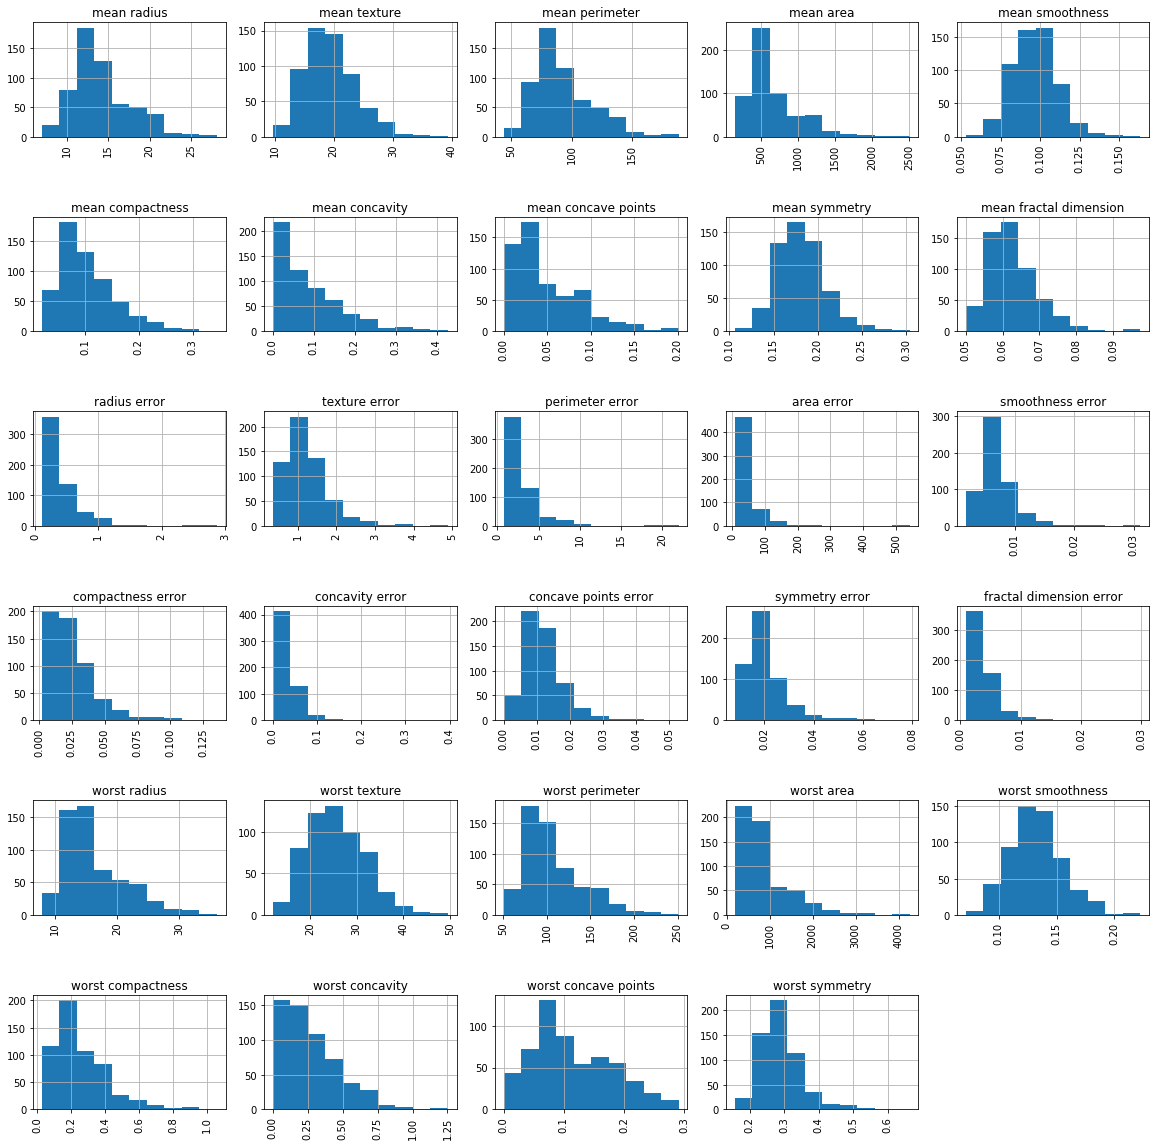

In [87]:
fig = plt.figure(figsize=(20,20))
cols = 5
rows = (cancer_.shape[1] - 1) / cols
for i, column in enumerate(cancer_.columns[1:-1]):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if cancer_.dtypes[column] == np.object:
        cancer_[column].value_counts().plot(kind="bar", axes=ax)
    else:
        cancer_[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Pearson Correlation Matrix

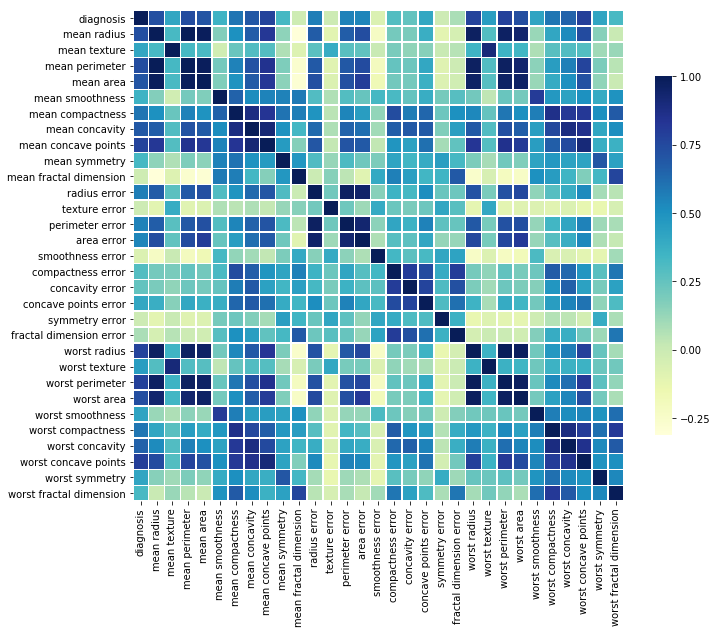

In [97]:
corr = cancer_.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 11))

sns.heatmap(corr, cmap="YlGnBu", square=True, xticklabels=True, yticklabels=True, linewidths=.6, cbar_kws={"shrink": .6}, ax=ax)

첫 시각화 도표에는 feature 중 약 반절이 가우시안 분포를 보임을 확인할 수 있고, 변수들 값이 소수점부터 심지어는 몇천까지 혼재되어 있습니다. 그래서 **feature scaling(normalize)** 을 해야할 것으로 예상하였으나, 이를 추후 기계학습에 적용해 본 결과, 오히려 성능이 더 떨어졌습니다. 이는 normalization이 모든 특성들을 '동등'하게 취급하는데, 우리의 유방암 데이터셋은 특정 특성들이 높은 상관관계를 지니고 있어서 normalization이 적합하지 않기 때문입니다. 따라서 feature scaling은 배제했습니다.

아래 도표에서는 우리가 갖고 있는 데이터셋이 대부분 양의 상관관계를 지니고 있다는 것을 확인할 수 있습니다. 이 중 특히 강한 상관관계를 갖고 있다고 보여지는 독립적인 6개의 특징들의 관계를 그려보도록 하겠습니다. 6개의 특징으로는 'worst concave points', 'mean concavity', 'worst perimeter', 'worst radius', 'worst area', 그리고 'diagnosis'를 선정했습니다.

### Scatter Matrix

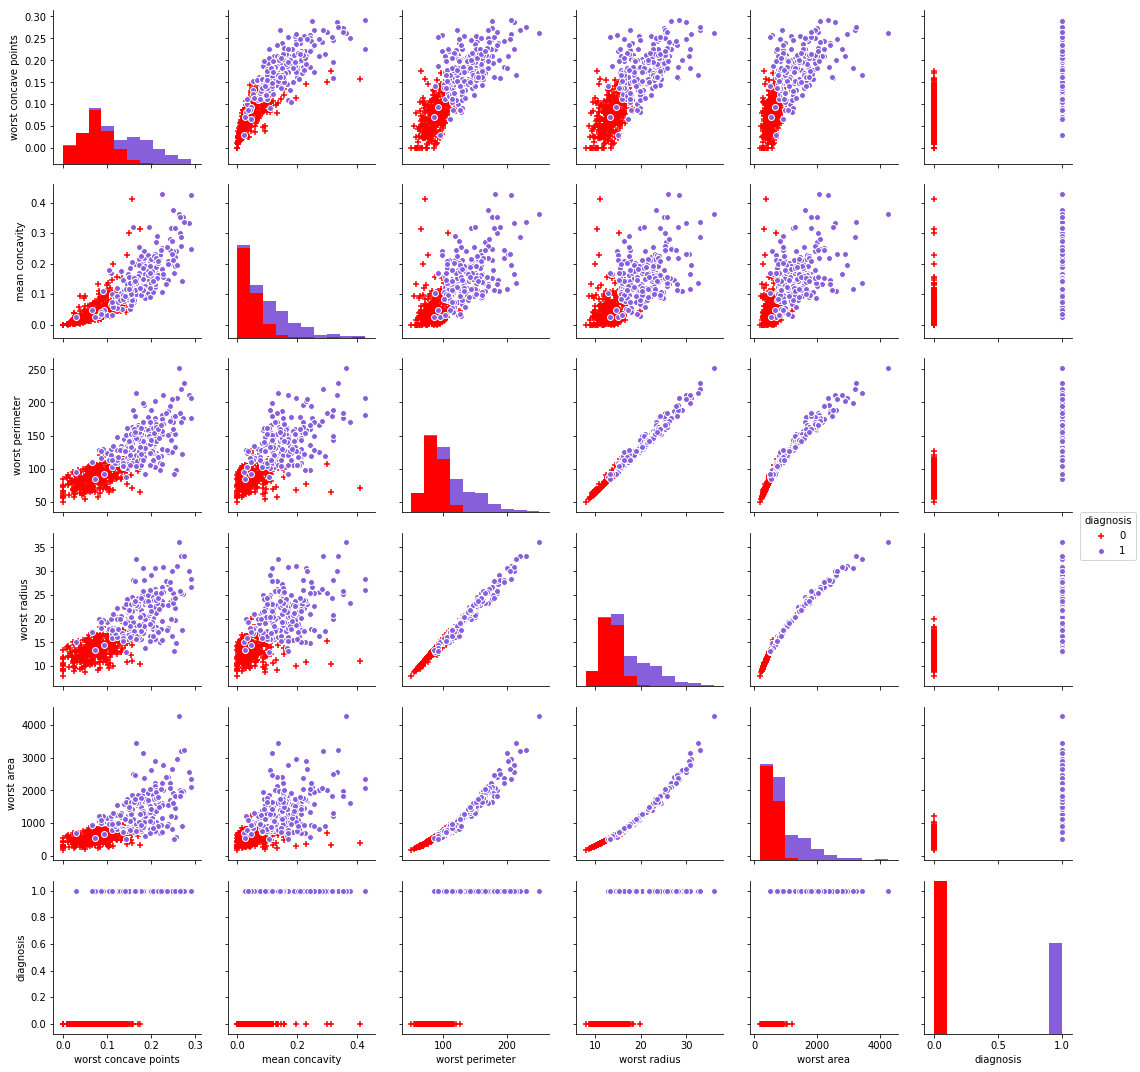

In [101]:
sixatt = ['worst concave points', 'mean concavity', 'worst perimeter', 'worst radius', 'worst area', 'diagnosis']

sns.pairplot(cancer_, x_vars = sixatt, y_vars = sixatt, hue = 'diagnosis', palette = ('Red', '#875FDB'), markers=["+", "o"])

위 scatter plot은 6개의 특성들 사이의 관계를 표로 나타냅니다. 특히 강한 상관관계를 가지고 있었던 특성들이었던 만큼, Malignant와 Benign을 쉽게 구분할 수 있었다는 것을 알 수 있습니다. 이러한 산점도 행렬 도표는 데이터셋 속 변수들 간의 관계가 어떻게 형성되어있는지를 알 수 있는 쉬운 지표가 됩니다.

# Machine Learning Part
### 1. KNN Classifier
데이터에 대한 분석을 끝냈으니, 이제 본격적으로 데이터에 기계학습을 적용해 보도록 하겠습니다.

In [250]:
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import normalize
import sklearn.metrics as metrics

In [142]:
#----------KNN Classifier 
feature_data = cancer_.iloc[:, cancer_.columns != 'diagnosis']
feature_target = cancer_.iloc[:, cancer_.columns == 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(feature_data, feature_target, test_size=0.2, random_state=42)

# Clean y values to avoid future warning messages
# for 'ravel()', refer to 'https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html'.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
knn_grid = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_grid.fit(X_train, y_train)

print('======== K-Neighbors Classifier Result ========')
print('Test set score: {:.3f}'.format(knn_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(knn_grid.best_params_))
print('Best CV score: {:.3f}'.format(knn_grid.best_score_))
print('Best Estimator among KNN:\n{}'.format(knn_grid.best_estimator_))
print('<<Classification Result>>\n', classification_report(y_test, knn_grid.predict(X_test)))
# display(pd.DataFrame(knn_grid.cv_results_).head())

======== K-Neighbors Classifier Result ========
Test set score: 0.956
Best Parameter: {'algorithm': 'auto', 'n_neighbors': 9}
Best CV score: 0.927
Best Estimator among KNN:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')
<<Classification Result>>
              precision    recall  f1-score   support

          0       0.95      0.99      0.97        71
          1       0.97      0.91      0.94        43

avg / total       0.96      0.96      0.96       114



### 2. Logistic Regression

In [146]:
#----------------Logistic Regression
lr = LogisticRegression()
param_lr = {'C': [0.1, 0.3, 1, 3, 10]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
lr_grid = GridSearchCV(lr, param_lr, cv=5, return_train_score=True)
lr_grid.fit(X_train, y_train)

print('======== Logistic Regression Classifier Result ========')
print('Test set score: {:.3f}'.format(lr_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(lr_grid.best_params_))
print('Best CV score: {:.3f}'.format(lr_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, lr_grid.predict(X_test)))

======== Logistic Regression Classifier Result ========
Test set score: 0.956
Best Parameter: {'C': 10}
Best CV score: 0.960
<<Classification Result>>
              precision    recall  f1-score   support

          0       0.95      0.99      0.97        71
          1       0.97      0.91      0.94        43

avg / total       0.96      0.96      0.96       114



### 3. Decision Tree

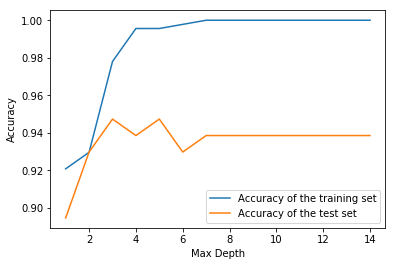

In [183]:
#---------------- Decision Tree
training_accuracy = list()
test_accuracy = list()

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=30)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [184]:
# Select Best parameter using GridSearchCV and 5-fold Cross Validation
dt = DecisionTreeClassifier(random_state=30)
param_dt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt', 'log2', None]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
dt_grid = GridSearchCV(dt, param_dt, cv=5, return_train_score=True)
dt_grid.fit(X_train, y_train)

print('======== Decision Tree Result ========')
print('Test set score: {:.3f}'.format(dt_grid.score(X_test, y_test)))
print('Best Parameter: {}'.format(dt_grid.best_params_))
print('Best CV score: {:.3f}'.format(dt_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, dt_grid.predict(X_test)))

======== Decision Tree Result ========
Test set score: 0.965
Best Parameter: {'max_depth': 3, 'max_features': 'auto'}
Best CV score: 0.949
<<Classification Result>>
              precision    recall  f1-score   support

          0       0.95      1.00      0.97        71
          1       1.00      0.91      0.95        43

avg / total       0.97      0.96      0.96       114



,worst radius,worst concave points,mean concavity,mean texture,worst texture,area error,worst fractal dimension,concave points error,worst symmetry,worst concavity,...,texture error,radius error,mean fractal dimension,mean symmetry,mean concave points,mean compactness,mean smoothness,mean area,mean perimeter,compactness error
0,0.736487,0.133257,0.046187,0.039558,0.024379,0.010233,0.009898,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


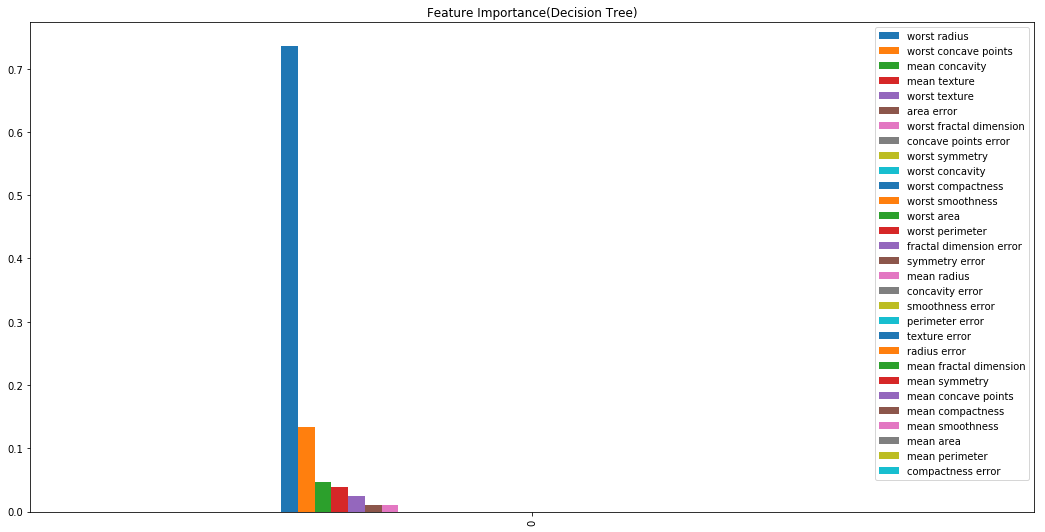

In [303]:
# Feature Importance of Decision Tree
dt2 = DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=30)
dt2.fit(X_train, y_train)

# Convert Feature Importance array to 1-row DataFrame, and name&sort the columns
TreeFI = pd.DataFrame(dt2.feature_importances_.reshape(1,-1))
TreeFI.columns = cancer_.columns[1:31]
TreeFI = TreeFI.sort_values(by=0, ascending=False, axis=1)
display(TreeFI)

dtfig = TreeFI.plot(kind='bar', title='Feature Importance(Decision Tree)', legend=True, figsize=(18,9))
#dtfig.set_xlabel('Feature')
#dtfig.set_ylabel('Feature Importance')

### 4. Neural Network(MLP)

In [254]:
# For MLP, Let's scale data first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=42)
param_mlp = {'activation': ['logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd'], 
             'alpha': [0.0001, 0.0003, 0.001, 0.003], 'max_iter': [1000, 1500, 2000]}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
mlp_grid = GridSearchCV(mlp, param_mlp, cv=5)
mlp_grid.fit(X_train_scaled, y_train)

print('======== Neural Network Classifier Result ========')
print('Test set score: {:.3f}'.format(mlp_grid.score(X_test_scaled, y_test)))
print('Best Parameter: {}'.format(mlp_grid.best_params_))
print('Best CV score: {:.3f}'.format(mlp_grid.best_score_))
print('Best Estimator among MLP:\n{}'.format(mlp_grid.best_estimator_))
print('<<Classification Result>>\n', classification_report(y_test, mlp_grid.predict(X_test_scaled)))
# display(pd.DataFrame(mlp_grid.cv_results_).head())

======== Neural Network Classifier Result ========
Test set score: 0.982
Best Parameter: {'activation': 'tanh', 'alpha': 0.0001, 'max_iter': 1000, 'solver': 'sgd'}
Best CV score: 0.974
Best Estimator among MLP:
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
<<Classification Result>>
              precision    recall  f1-score   support

          0       0.97      1.00      0.99        71
          1       1.00      0.95      0.98        43

avg / total       0.98      0.98      0.98       114



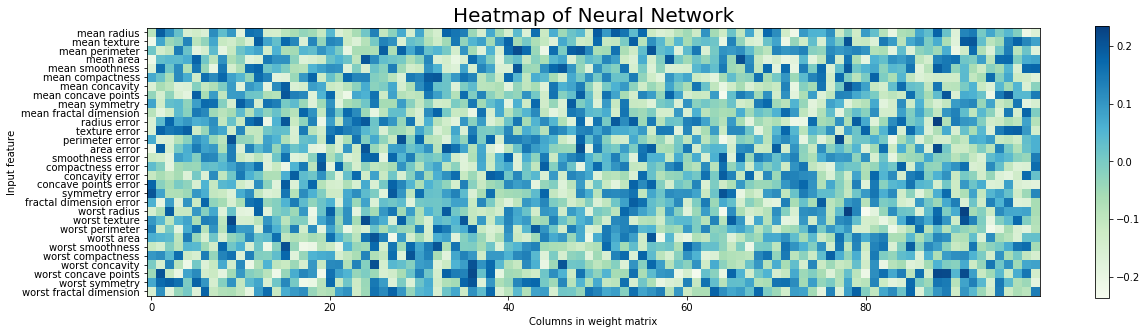

In [301]:
# Neural Network using the best selection chby GridSearchCV above
mlp = MLPClassifier(activation='tanh', alpha=1, max_iter=1000, solver='sgd', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Draw Heatmap of Neural Network 
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='nearest',cmap='GnBu')
plt.yticks(range(30), cancer_.columns[1:31])
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.title('Heatmap of Neural Network', fontsize=20)
plt.colorbar()

### 5. Support Vector Machine

In [280]:
svm = SVC()
svm.fit(X_train, y_train)

print('Train Dataset Accuracy: {:.3f}'.format(svm.score(X_train,y_train)))
print('Test Dataset Accuracy: {:.3f}'.format(svm.score(X_test,y_test)))

Train Dataset Accuracy: 1.000
Test Dataset Accuracy: 0.623


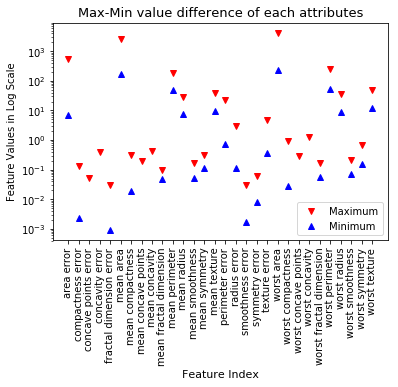

In [312]:
# Show whether there is a huge difference between max-min values of each attributes
plt.plot(X_train.max(axis='index'), 'v', label='Maximum', color='r')
plt.plot(X_train.min(axis='index'), '^', label='Minimum', color='b')

plt.xlabel('Feature Index', fontsize=11)
plt.xticks(rotation=90)
plt.ylabel('Feature Values in Log Scale')
plt.yscale('log')
plt.title('Max-Min value difference of each attributes', fontsize=13)
plt.legend(loc='lower right')

In [289]:
svm = SVC()
param_svm = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10], 'decision_function_shape': ['ovo', 'ovr']}

# Select Best parameter using GridSearchCV and 5-fold Cross Validation
# We'll use scaled data like MLP to prevent overfitting.
svm_grid = GridSearchCV(svm, param_svm, cv=5)
svm_grid.fit(X_train_scaled, y_train)

print('======== Support Vector Machine Result ========')
print('Test set score: {:.3f}'.format(svm_grid.score(X_test_scaled, y_test)))
print('Best Parameter: {}'.format(svm_grid.best_params_))
print('Best CV score: {:.3f}'.format(svm_grid.best_score_))
print('<<Classification Result>>\n', classification_report(y_test, svm_grid.predict(X_test_scaled)))

======== Support Vector Machine Result ========
Test set score: 0.982
Best Parameter: {'C': 3, 'decision_function_shape': 'ovo'}
Best CV score: 0.976
<<Classification Result>>
              precision    recall  f1-score   support

          0       0.97      1.00      0.99        71
          1       1.00      0.95      0.98        43

avg / total       0.98      0.98      0.98       114



### 6. Baseline: ZeroR

ZeroR 알고리즘은 직접 구현했습니다. ZeroR은 정말 간단한 알고리즘답게, 62.3%라는 낮은 정확도가 나오는 것을 확인할 수 있었습니다.

In [345]:
import collections

# Count the number of frequency for each y values, and choose the most frequent class
def ZeroR(y_train, X_test):
    num_pred = []
    for i in range(len(y_train)):
        num_pred.append((y_train[i]))
    counter=collections.Counter(num_pred)
    y_pred = np.array([next(iter(counter)) for i in range(len(X_test))])
    return y_pred

y_pred = ZeroR(y_train, X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The Test accuracy of ZeroR is: {:.3f}".format(accuracy))

The Test accuracy of ZeroR is: 0.623


### 7. Baseline: OneR

OneR은 파이썬으로 제대로 구현되어 있는 것이 없고, numerical value들을 범주형 특성으로 바꾸어주어야 하기 때문에 어렵습니다. 따라서 R의 OneR 라이브러리를 사용했습니다. R코드는 첨부되어 있는 'OneR Algorithm'(R로 작성)이라는 파일을 확인하시면 됩니다. OneR 알고리즘에 의한 결과를 요약하자면 다음과 같습니다. 비록 baseline이고 아래와 같이 룰이 간단하지만, 92.09%라는 꽤 높은 accuracy를 보였습니다.

In [ ]:
'''
Rules:
If worst perimeter = (50.2,110] then diagnosis = B
If worst perimeter = (110,251]  then diagnosis = M

Accuracy:
419 of 455 instances classified correctly (92.09%)

Contingency table:
         worst perimeter
diagnosis (50.2,110] (110,251] Sum
      B        * 271        14 285
      M           22     * 148 170
      Sum        293       162 455
'''